In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading dataframe
df = pd.read_csv('Accidents_Dalian_2020.csv')
df.head()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Seasons,Day Off,Work Day
0,285.0,7,1063.0,19.40,0.000,8.96,0.0,0.0,0.6,10380,Winter,No,Yes
1,0.0,15,1039.0,78.62,0.990,51.44,0.0,0.0,1.4,22032,Autumn,No,No
2,676.0,11,1045.0,91.22,2.992,66.74,0.0,0.0,2.1,12240,NaN,No,Yes
3,1269.0,20,1052.0,50.90,0.000,33.80,0.0,0.0,1.4,13836,Autumn,No,Yes
4,176.0,2,1035.0,33.62,0.000,8.96,0.0,0.0,0.5,22272,Spring,No,Yes


In [3]:
df.shape

(8759, 13)

In [4]:
df.describe()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM)
count,8641.000000,8759.000000,8746.000000,8730.000000,8727.000000,8751.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,702.492188,11.501313,1058.234279,55.203010,0.625706,39.347974,0.075077,0.148704,1.724854,17241.138029
std,645.290221,6.921886,20.350982,21.505567,0.955314,23.511103,0.436770,1.128256,1.036347,7299.644038
min,0.000000,0.000000,1000.000000,-0.040000,0.000000,-23.080000,0.000000,0.000000,0.000000,324.000000
25%,190.000000,6.000000,1042.000000,38.300000,0.000000,23.540000,0.000000,0.000000,0.900000,11280.000000
50%,500.000000,12.000000,1057.000000,56.660000,0.011000,41.180000,0.000000,0.000000,1.500000,20376.000000
75%,1062.000000,17.500000,1074.000000,72.500000,1.023000,58.640000,0.000000,0.000000,2.300000,24000.000000
max,3556.000000,23.000000,1098.000000,102.920000,3.872000,80.960000,8.800000,35.000000,7.400000,24000.000000


In [5]:
#checking missing values
df.isna().sum()

Frequency of Accidents                  118
Hour                                      0
Pressure(Pa)                             13
Temperature(F)                           29
Sun Energy (Mj/m2)                       32
Frost Point (F)                           8
Road Slippery Indicator of Rainfall       0
Road Slippery Indicator of Snowfall       0
Wind Speed (m/s)                          0
CO (PPM)                                  0
Seasons                                1587
Day Off                                   0
Work Day                                  0
dtype: int64

In [6]:
#changing Yes/No columns to 1/0
df['Day Off'].replace(to_replace='No', value=0, inplace=True)
df['Day Off'].replace(to_replace='Yes', value=1, inplace=True)
df['Work Day'].replace(to_replace='No', value=0, inplace=True)
df['Work Day'].replace(to_replace='Yes', value=1, inplace=True)
df.head()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Seasons,Day Off,Work Day
0,285.0,7,1063.0,19.40,0.000,8.96,0.0,0.0,0.6,10380,Winter,0,1
1,0.0,15,1039.0,78.62,0.990,51.44,0.0,0.0,1.4,22032,Autumn,0,0
2,676.0,11,1045.0,91.22,2.992,66.74,0.0,0.0,2.1,12240,NaN,0,1
3,1269.0,20,1052.0,50.90,0.000,33.80,0.0,0.0,1.4,13836,Autumn,0,1
4,176.0,2,1035.0,33.62,0.000,8.96,0.0,0.0,0.5,22272,Spring,0,1


In [7]:
df.describe()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Day Off,Work Day
count,8641.000000,8759.000000,8746.000000,8730.000000,8727.000000,8751.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,702.492188,11.501313,1058.234279,55.203010,0.625706,39.347974,0.075077,0.148704,1.724854,17241.138029,0.049321,0.966320
std,645.290221,6.921886,20.350982,21.505567,0.955314,23.511103,0.436770,1.128256,1.036347,7299.644038,0.216549,0.180414
min,0.000000,0.000000,1000.000000,-0.040000,0.000000,-23.080000,0.000000,0.000000,0.000000,324.000000,0.000000,0.000000
25%,190.000000,6.000000,1042.000000,38.300000,0.000000,23.540000,0.000000,0.000000,0.900000,11280.000000,0.000000,1.000000
50%,500.000000,12.000000,1057.000000,56.660000,0.011000,41.180000,0.000000,0.000000,1.500000,20376.000000,0.000000,1.000000
75%,1062.000000,17.500000,1074.000000,72.500000,1.023000,58.640000,0.000000,0.000000,2.300000,24000.000000,0.000000,1.000000
max,3556.000000,23.000000,1098.000000,102.920000,3.872000,80.960000,8.800000,35.000000,7.400000,24000.000000,1.000000,1.000000


In [8]:
X_columns = list(df.columns)
X_columns.remove('Seasons')

In [9]:
#removing rows with missing values (except for Seasons column)
df.dropna(subset = X_columns  , inplace=True)

In [10]:
X = df[df.loc[:,'Seasons'].isna() == False].loc[:,X_columns]

In [11]:
y = df[df.loc[:,'Seasons'].isna() == False].loc[:,'Seasons']

In [12]:
df.head()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Seasons,Day Off,Work Day
0,285.0,7,1063.0,19.40,0.000,8.96,0.0,0.0,0.6,10380,Winter,0,1
1,0.0,15,1039.0,78.62,0.990,51.44,0.0,0.0,1.4,22032,Autumn,0,0
2,676.0,11,1045.0,91.22,2.992,66.74,0.0,0.0,2.1,12240,NaN,0,1
3,1269.0,20,1052.0,50.90,0.000,33.80,0.0,0.0,1.4,13836,Autumn,0,1
4,176.0,2,1035.0,33.62,0.000,8.96,0.0,0.0,0.5,22272,Spring,0,1


In [13]:
df.shape

(8559, 13)

In [14]:
#spliting data into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
#predicting test data using KNN with K =10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train.iloc[:,[3,4,8]], y_train)
y_pred = knn.predict(X_test.iloc[:,[3,4,8]])

In [16]:
#calculating accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6868327402135231

In [17]:
#predicting Seasons missing values
X_nan = df.loc[df['Seasons'].isna(), X_columns]
df.loc[df['Seasons'].isna(), 'Seasons'] = knn.predict(X_nan.iloc[:,[3,4,8]])

In [18]:
#calculating accuracy for different K values
acc = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.iloc[:,[3,4,8]], y_train)
    y_pred = knn.predict(X_test.iloc[:,[3,4,8]])
    acc.append(accuracy_score(y_test, y_pred))

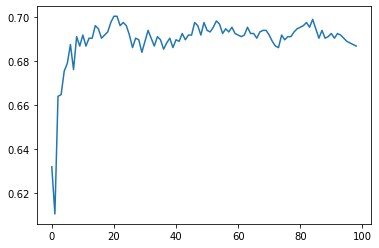

In [19]:
#ploting accuracy for different K values
import matplotlib.pyplot as plt
plt.plot(acc)

In [20]:
#determining K with most accuracy
max_acc_k = acc.index(max(acc))
max_acc_k

20

In [21]:
#determining most accuracy
max_acc = acc[max_acc_k]
max_acc

0.700355871886121

In [22]:
df.head()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Seasons,Day Off,Work Day
0,285.0,7,1063.0,19.40,0.000,8.96,0.0,0.0,0.6,10380,Winter,0,1
1,0.0,15,1039.0,78.62,0.990,51.44,0.0,0.0,1.4,22032,Autumn,0,0
2,676.0,11,1045.0,91.22,2.992,66.74,0.0,0.0,2.1,12240,Summer,0,1
3,1269.0,20,1052.0,50.90,0.000,33.80,0.0,0.0,1.4,13836,Autumn,0,1
4,176.0,2,1035.0,33.62,0.000,8.96,0.0,0.0,0.5,22272,Spring,0,1


In [23]:
#forming new dataframe for Winter Season
new_df = df[df['Seasons'] == 'Winter']
new_df.head()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Seasons,Day Off,Work Day
0,285.0,7,1063.0,19.40,0.000,8.96,0.0,0.0,0.6,10380,Winter,0,1
10,221.0,10,1031.0,33.98,0.275,6.62,0.0,0.0,0.7,22776,Winter,0,1
16,646.0,17,1030.0,47.66,1.056,17.78,0.0,0.0,3.1,13404,Winter,0,1
17,245.0,11,1035.0,29.12,0.957,4.82,0.0,0.0,2.1,21744,Winter,0,1
18,196.0,0,1060.0,31.46,0.000,19.22,0.0,0.0,1.9,4080,Winter,0,1


In [24]:
new_df.shape

(2163, 13)

In [25]:
#checking correlations
new_df.corr()

,Frequency of Accidents,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Day Off,Work Day
Frequency of Accidents,1.000000,0.339520,-0.167323,0.371389,0.165416,0.131269,-0.167094,-0.091548,0.030353,0.013025,-0.135789,NaN
Hour,0.339520,1.000000,-0.196769,0.205602,0.136635,-0.004145,-0.049828,0.020819,0.212333,0.058779,0.005750,NaN
Pressure(Pa),-0.167323,-0.196769,1.000000,0.231962,-0.456277,0.795917,0.330784,0.165076,-0.353034,-0.751942,-0.027576,NaN
Temperature(F),0.371389,0.205602,0.231962,1.000000,0.183495,0.760279,-0.047868,0.068512,-0.124055,-0.535214,0.129634,NaN
Sun Energy (Mj/m2),0.165416,0.136635,-0.456277,0.183495,1.000000,-0.223393,-0.065624,-0.041542,0.355553,0.164683,0.033780,NaN
Frost Point (F),0.131269,-0.004145,0.795917,0.760279,-0.223393,1.000000,0.157847,0.134323,-0.323739,-0.812144,0.049283,NaN
Road Slippery Indicator of Rainfall,-0.167094,-0.049828,0.330784,-0.047868,-0.065624,0.157847,1.000000,0.059541,-0.059077,-0.208504,-0.059817,NaN
Road Slippery Indicator of Snowfall,-0.091548,0.020819,0.165076,0.068512,-0.041542,0.134323,0.059541,1.000000,-0.013262,-0.115515,0.056318,NaN
Wind Speed (m/s),0.030353,0.212333,-0.353034,-0.124055,0.355553,-0.323739,-0.059077,-0.013262,1.000000,0.293066,0.049461,NaN
CO (PPM),0.013025,0.058779,-0.751942,-0.535214,0.164683,-0.812144,-0.208504,-0.115515,0.293066,1.000000,0.019160,NaN


In [39]:
X = new_df.iloc[:,[1,2,3,4,5,6,7,8,9,11]]
X.reset_index(drop = True , inplace = True)
X.head()

,Hour,Pressure(Pa),Temperature(F),Sun Energy (Mj/m2),Frost Point (F),Road Slippery Indicator of Rainfall,Road Slippery Indicator of Snowfall,Wind Speed (m/s),CO (PPM),Day Off
0,7,1063.0,19.40,0.000,8.96,0.0,0.0,0.6,10380,0
1,10,1031.0,33.98,0.275,6.62,0.0,0.0,0.7,22776,0
2,17,1030.0,47.66,1.056,17.78,0.0,0.0,3.1,13404,0
3,11,1035.0,29.12,0.957,4.82,0.0,0.0,2.1,21744,0
4,0,1060.0,31.46,0.000,19.22,0.0,0.0,1.9,4080,0


In [27]:
y = new_df.loc[:,'Frequency of Accidents']
y.reset_index(drop = True , inplace = True)
y.head()

0    285.0
1    221.0
2    646.0
3    245.0
4    196.0
Name: Frequency of Accidents, dtype: float64

In [46]:
#spliting data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
#checking p-value of the features
import statsmodels.api as sm
reg_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Frequency of Accidents   R-squared (uncentered):                   0.771
Model:                                OLS   Adj. R-squared (uncentered):              0.770
Method:                     Least Squares   F-statistic:                              578.6
Date:                    Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                            02:15:57   Log-Likelihood:                         -10917.
No. Observations:                    1730   AIC:                                  2.185e+04
Df Residuals:                        1720   BIC:                                  2.191e+04
Df Model:                              10                                                  
Covariance Type:                nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Hour                                    5.2491      0.491     10.682      0.000       4.285       6.213
Pressure(Pa)                           -0.0958      0.018     -5.246      0.000      -0.132      -0.060
Temperature(F)                          8.3357      0.683     12.206      0.000       6.996       9.675
Sun Energy (Mj/m2)                      1.2843      7.475      0.172      0.864     -13.376      15.945
Frost Point (F)                        -0.7763      0.646     -1.202      0.229      -2.043       0.490
Road Slippery Indicator of Rainfall   -18.6814      4.620     -4.044      0.000     -27.743      -9.620
Road Slippery Indicator of Snowfall   -29.1219      7.224     -4.031      0.000     -43.291     -14.953
Wind Speed (m/s)                       -5.1403      3.124     -1.646      0.100     -11.267       0.986
CO (PPM)                                0.0041      0.001      5.405      0.000       0.003       0.006
Day Off                              -110.8448     11.697     -9.476      0.000    -133.787     -87.902
==============================================================================
Omnibus:                      905.830   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10061.448
Skew:                           2.206   Prob(JB):                         0.00
Kurtosis:                      13.960   Cond. No.                     6.95e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#determining candidate features based on correlation and p-values
candidates = ['Hour','Pressure(Pa)','Temperature(F)','Road Slippery Indicator of Rainfall','Road Slippery Indicator of Snowfall','CO (PPM)','Day Off']

In [49]:
#calculating and recording MSE of the model for different combinations of the candidate features
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
models_mse = {}
for i in range(1,8):
    for j in list(combinations(candidates , i)):
        reg.fit(X_train.loc[:,list(j)],y_train)
        y_pred = reg.predict(X_test.loc[:,list(j)])
        models_mse[j] = mean_squared_error(y_test, y_pred)

In [50]:
#determining minimum MSE
min_mse = min(models_mse.values())
min_mse

20907.280835500558

In [51]:
#determining features of the model with minimum MSE
best_model = list((models_mse.keys()))[list(models_mse.values()).index(min_mse)]
best_model

('Hour',
 'Temperature(F)',
 'Road Slippery Indicator of Rainfall',
 'Road Slippery Indicator of Snowfall',
 'CO (PPM)',
 'Day Off')

In [52]:
#Linear Regression
reg.fit(X_train.loc[:,list(best_model)],y_train)

LinearRegression()

In [53]:
#regression coefficient
reg.coef_

array([ 5.21955673e+00,  7.81777697e+00, -2.01937568e+01, -3.04313411e+01,
        4.82076886e-03, -1.11533829e+02])

In [54]:
#regression intercept
reg.intercept_

-115.34559879378949

In [55]:
#final model
print('model : \nFrequency of Accidents =' , end = '')
for i in range(6):
    print(f'{reg.coef_[i]}*({best_model[i]}) + ', end = '')
print(f'{reg.intercept_}')

model : 
Frequency of Accidents =5.219556732666255*(Hour) + 7.817776973224584*(Temperature(F)) + -20.193756755657816*(Road Slippery Indicator of Rainfall) + -30.431341100514825*(Road Slippery Indicator of Snowfall) + 0.004820768856030422*(CO (PPM)) + -111.53382893962709*(Day Off) + -115.34559879378949
